##                                   Predictive Modeling for Heart Disease Detection

### Import Necessay Libraries

In [1]:
import tkinter as tk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Load Dataset

In [2]:
data = pd.read_csv("heart.csv")

### Data Profile Report (EDA)

In [3]:
import ydata_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### To check dataset, info, shape and missing values

In [4]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### SVM Model with User Interface

In [ ]:
import tkinter as tk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the heart disease dataset
data = pd.read_csv("heart.csv")

# Separate features (X) and target (y)
y = data["target"]
X = data.drop('target', axis=1)

# Feature names
feature_names = X.columns.tolist()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a radial basis function (RBF) kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Function to make predictions
def predict():
    input_data = {}
    for entry, feature in zip(entries, feature_names):
        value = float(entry.get())
        input_data[feature] = value

    input_data = pd.DataFrame([input_data])
    input_data_scaled = scaler.transform(input_data)
    prediction = svm_classifier.predict(input_data_scaled)
    if prediction[0] == 0:
        result_label.config(text="You are likely to have a heart attack.")
    else:
        result_label.config(text="You are not likely to have a heart attack.")

# Create the main window
root = tk.Tk()
root.title("Heart Disease Prediction")

# Create labels and entry fields for user input
entries = []
for i, feature in enumerate(feature_names):
    label = tk.Label(root, text=feature)
    label.grid(row=i, column=0, padx=5, pady=5, sticky="w")
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create a button to make predictions
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=len(feature_names), column=0, columnspan=2, padx=5, pady=5)

# Create a label to display the prediction result
result_label = tk.Label(root, text="")
result_label.grid(row=len(feature_names) + 1, column=0, columnspan=2, padx=5, pady=5)

# Run the main loop
root.mainloop()

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       159
           1       0.86      0.92      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



### Graphical Respresentation of Data

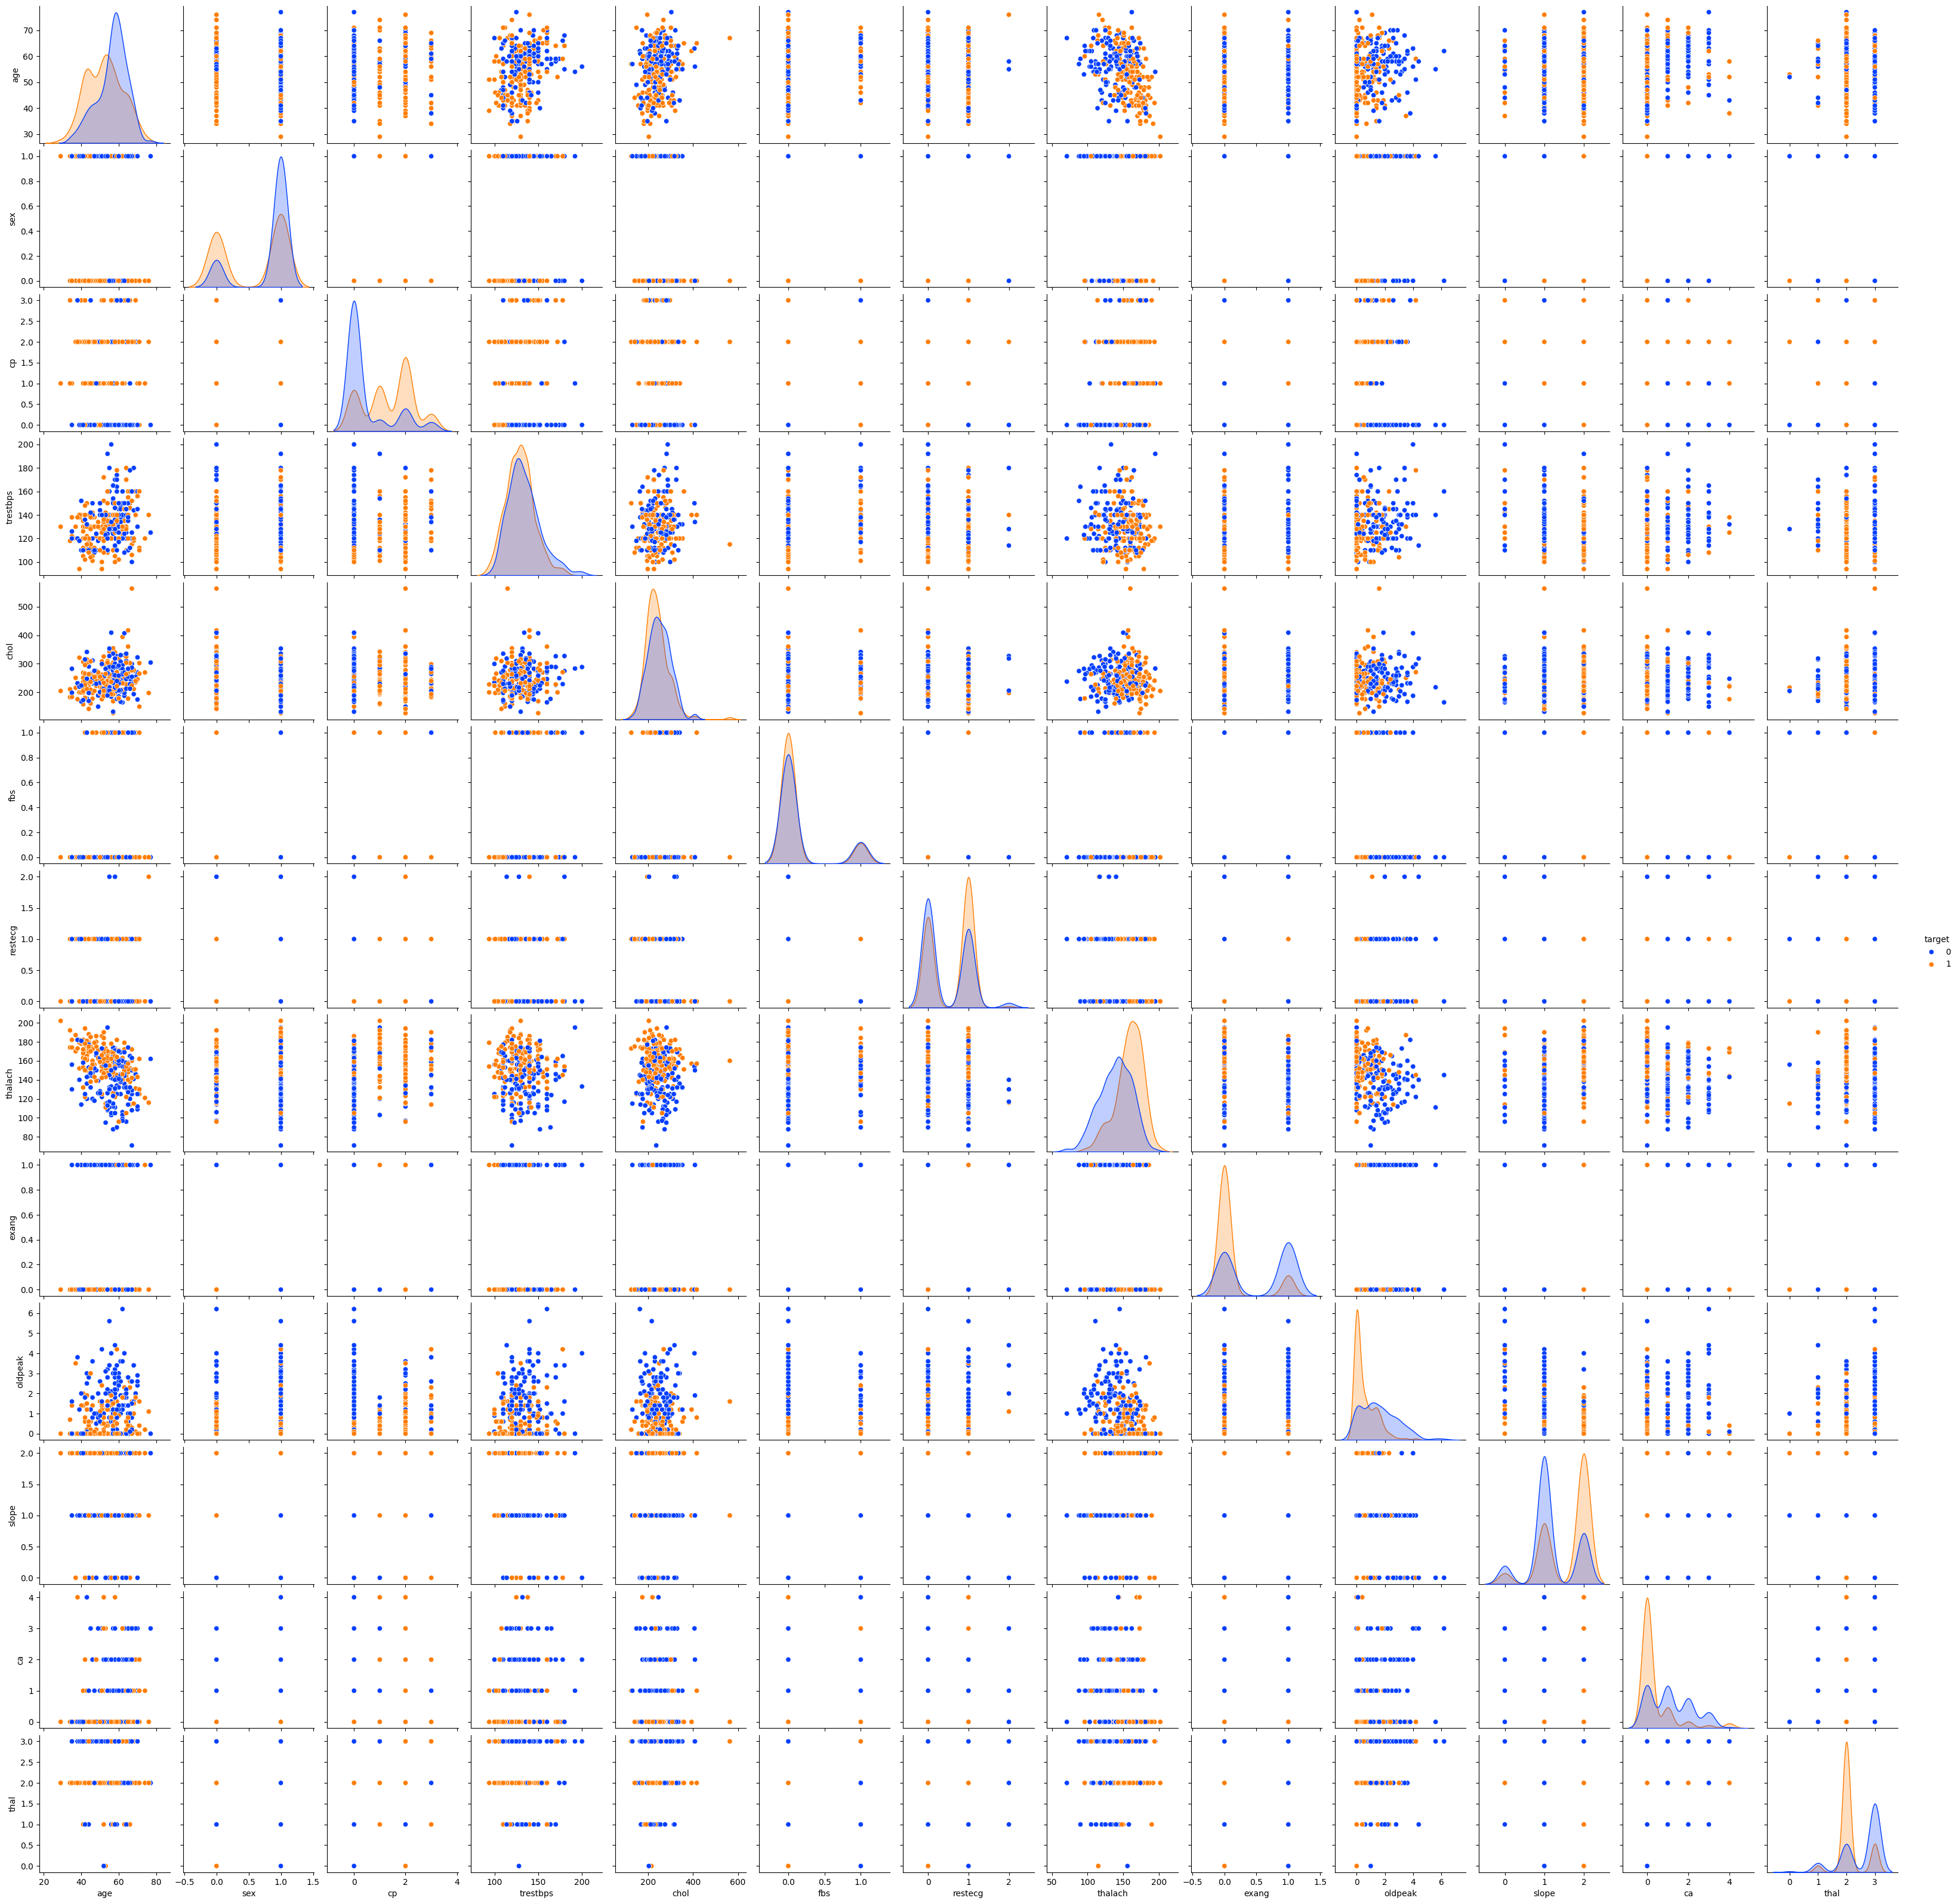

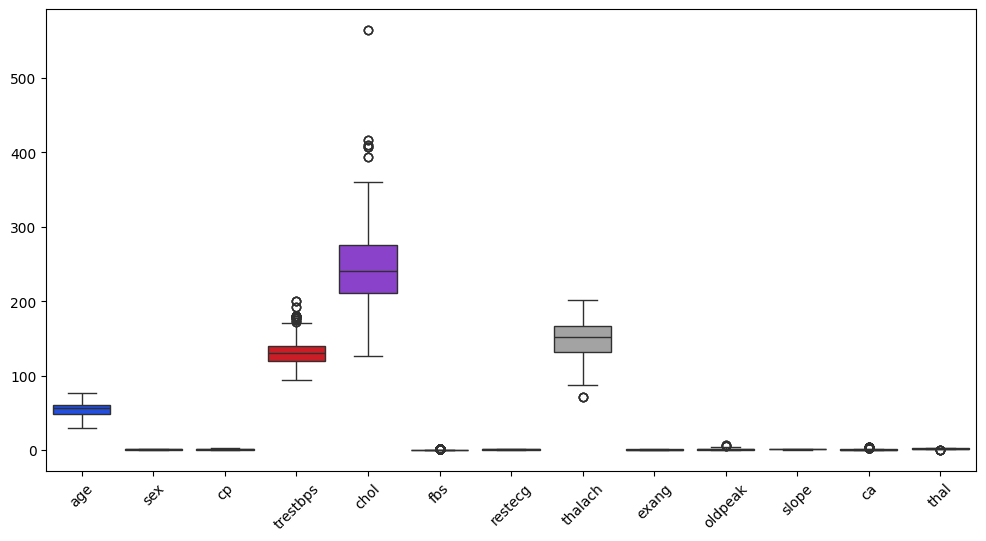

<ipython-input-1-89797a5ee889>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='bright')


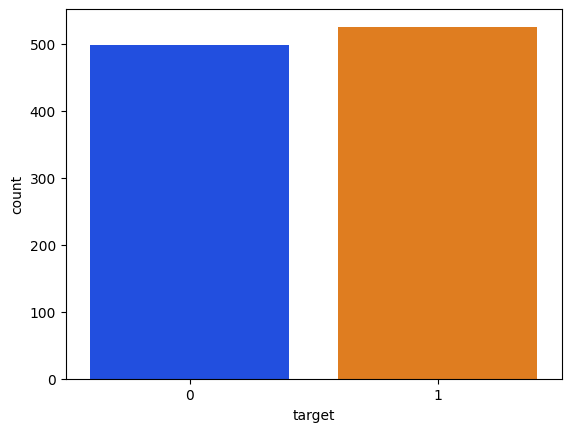

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


# Pairplot to visualize the distribution of each feature by class
sns.pairplot(data, hue='target', palette='bright')
plt.show()


# Boxplot to show the distribution of each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('target', axis=1), palette='bright')
plt.xticks(rotation=45)
plt.show()


# Count plot to show the number of instances for each class
sns.countplot(x='target', data=data, palette='bright')
plt.show()